In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


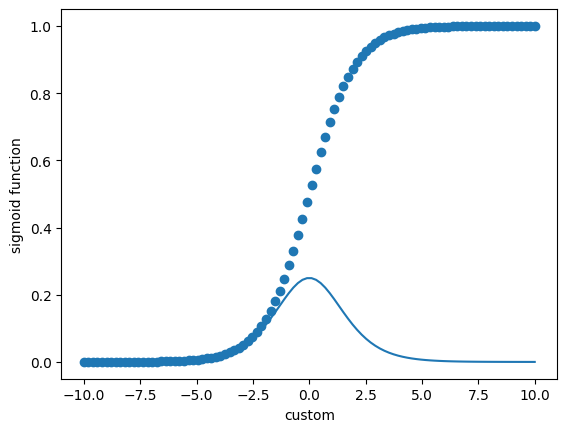

In [ ]:
X=np.linspace(-10,10,100)
def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivative_sig(x):
  return (1/(1+np.exp(-x)))*(1-(1/(1+np.exp(-x))))

def binary_los(X):
  loss=-np.sum(X*np.log(X)+(1-X)*np.log(1-X))
  return loss

y=np.tanh(X)
y=sigmoid(X)
y=sigmoid(X)+np.abs(np.min(sigmoid(X)))
y_up=derivative_sig(X)
#plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X,y_up)
plt.xlabel("custom")
plt.ylabel("sigmoid function")
plt.show()


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivative_sig(x):
  return (1/(1+np.exp(-x)))*(1-(1/(1+np.exp(-x))))

def predic(X,w,b):
  y_pred=np.dot(X,w)+b
  return sigmoid(y_pred)

def binary_loss(y_true,y_pred):
  m=y_true.shape[0]
  loss=1/m-np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
  return loss



Logisstic regresion implementation with python from scratch

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias

            predictions = self.sigmoid(model)
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if prob >= 0.5 else 0 for prob in predictions]

if __name__ == "__main__":
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([0, 0, 1, 1, 1])

    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X, y)

    predictions = model.predict(X)
    print("Predictions:", predictions)


Predictions: [0, 1, 1, 1, 1]


In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

class MultinomialLogisticRegression:
    def __init__(self, n_features, n_classes, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W = np.random.randn(n_features, n_classes)  # Weights for each class
        self.b = np.zeros((1, n_classes))  # Bias for each class

    def fit(self, X, y):
        m = X.shape[0]  # Number of samples

        for epoch in range(self.epochs):
            # Forward Pass: Compute logits (z) and probabilities (y_hat)
            z = np.dot(X, self.W) + self.b
            y_hat = softmax(z)

            # Compute the Cross-Entropy Loss
            loss = -np.mean(np.sum(np.log(y_hat) * np.eye(y_hat.shape[1])[y], axis=1))

            dz = y_hat - np.eye(y_hat.shape[1])[y]
            dW = np.dot(X.T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m

            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss}')

    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_hat = softmax(z)
        return np.argmax(y_hat, axis=1)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialLogisticRegression(n_features=X.shape[1], n_classes=3, learning_rate=0.1, epochs=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Epoch 0/3000, Loss: 1.235151307255065
Epoch 100/3000, Loss: 0.31768010795732315
Epoch 200/3000, Loss: 0.253139815176329
Epoch 300/3000, Loss: 0.21731676153670232
Epoch 400/3000, Loss: 0.1926289602608781
Epoch 500/3000, Loss: 0.1744252007740505
Epoch 600/3000, Loss: 0.16042540827503354
Epoch 700/3000, Loss: 0.14931980244645762
Epoch 800/3000, Loss: 0.14029286790166376
Epoch 900/3000, Loss: 0.13280867018266393
Epoch 1000/3000, Loss: 0.12650038131742578
Epoch 1100/3000, Loss: 0.12110858979201516
Epoch 1200/3000, Loss: 0.11644479390341468
Epoch 1300/3000, Loss: 0.11236881079536501
Epoch 1400/3000, Loss: 0.1087742804019873
Epoch 1500/3000, Loss: 0.1055790756353182
Epoch 1600/3000, Loss: 0.10271878945840572
Epoch 1700/3000, Loss: 0.1001422087390103
Epoch 1800/3000, Loss: 0.09780810406577617
Epoch 1900/3000, Loss: 0.09568291105298063
Epoch 2000/3000, Loss: 0.09373902785577576
Epoch 2100/3000, Loss: 0.09195354641508852
Epoch 2200/3000, Loss: 0.0903072940532492
Epoch 2300/3000, Loss: 0.08878410

In [ ]:
"""
the sparce max is enhanced and today most used loss function instead
of softmax
"""

def sparsemax(z):
    z_sorted = np.sort(z, axis=-1)[:, ::-1]
    cumsum_z = np.cumsum(z_sorted, axis=-1) - 1
    k = np.argmax(cumsum_z > 0, axis=-1)
    tau = cumsum_z[np.arange(len(k)), k] / (k + 1)

    sparsemax_probs = np.maximum(z - tau[:, None], 0)
    sparsemax_probs /= np.sum(sparsemax_probs, axis=-1, keepdims=True)

    return sparsemax_probs

